In [12]:
import requests, json

ENDPOINT_URL = "http://localhost:5543/yolov5-s-coco/predict/from_files"
IMAGE_PATH = "test/images/4b770a_3_6_png.rf.f5d975605c1f73e1a95a1d8edc4ce5b1.jpg"

resp = requests.post(
  url=ENDPOINT_URL,
  files=[('request', open(IMAGE_PATH, 'rb'))]
)

len(json.loads(resp.text)['boxes'][0])

17

In [11]:
import requests, json

ENDPOINT_URL = "http://localhost:5543/yolov5-s-finetuned/predict/from_files"
IMAGE_PATH = "test/images/4b770a_3_6_png.rf.f5d975605c1f73e1a95a1d8edc4ce5b1.jpg"

resp = requests.post(
  url=ENDPOINT_URL,
  files=[('request', open(IMAGE_PATH, 'rb'))]
)

len(json.loads(resp.text)['boxes'][0])

20

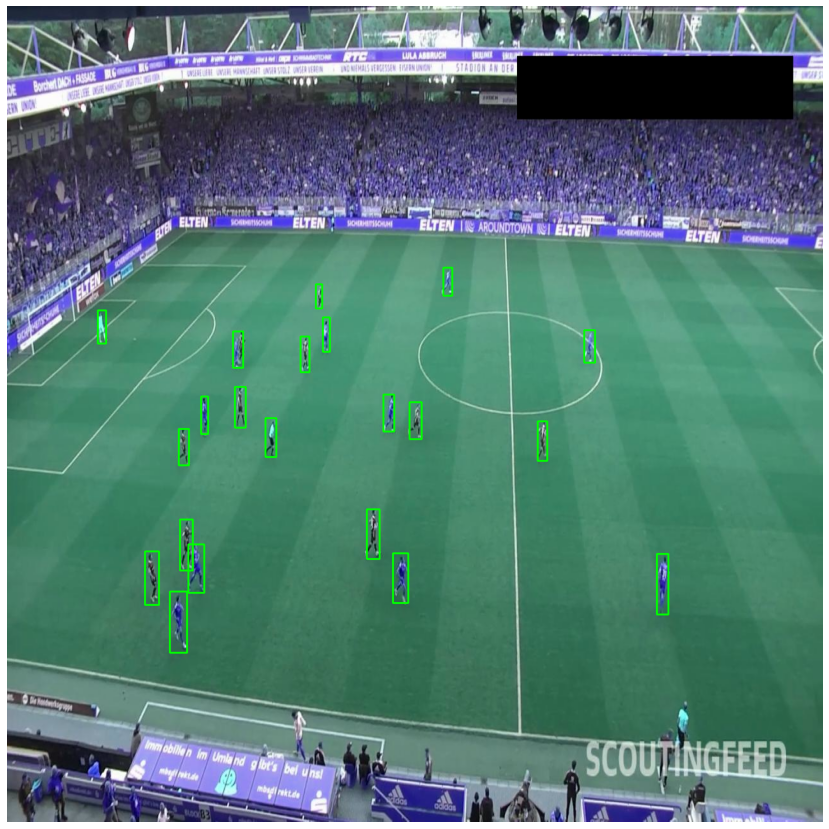

In [27]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15), facecolor='white')

MODEL_IMG_SIZE = 640
ENDPOINT_URL = "http://localhost:5543/yolov5-s-finetuned/predict/from_files"
IMAGE_PATH = "test/images/a9f16c_2_9_png.rf.c048a60764e56735d7465cdec974d102.jpg"

im = cv2.imread(IMAGE_PATH)
im_size = im.shape[:2]
assert im_size[0] == im_size[1]
scale_ratio = im_size[0] / MODEL_IMG_SIZE

resp = requests.post(
  url=ENDPOINT_URL,
  files=[('request', open(IMAGE_PATH, 'rb'))]
)

boxes = json.loads(resp.text)['boxes'][0]
for xmin, ymin, xmax, ymax in boxes:
    start_point = (int(xmin * scale_ratio), int(ymin * scale_ratio))
    end_point = (int(xmax * scale_ratio), int(ymax * scale_ratio))
    color = (0, 255, 0)
    thickness = 2
    im = cv2.rectangle(im, start_point, end_point, color, thickness)


plt.axis("off")
plt.imshow(im)

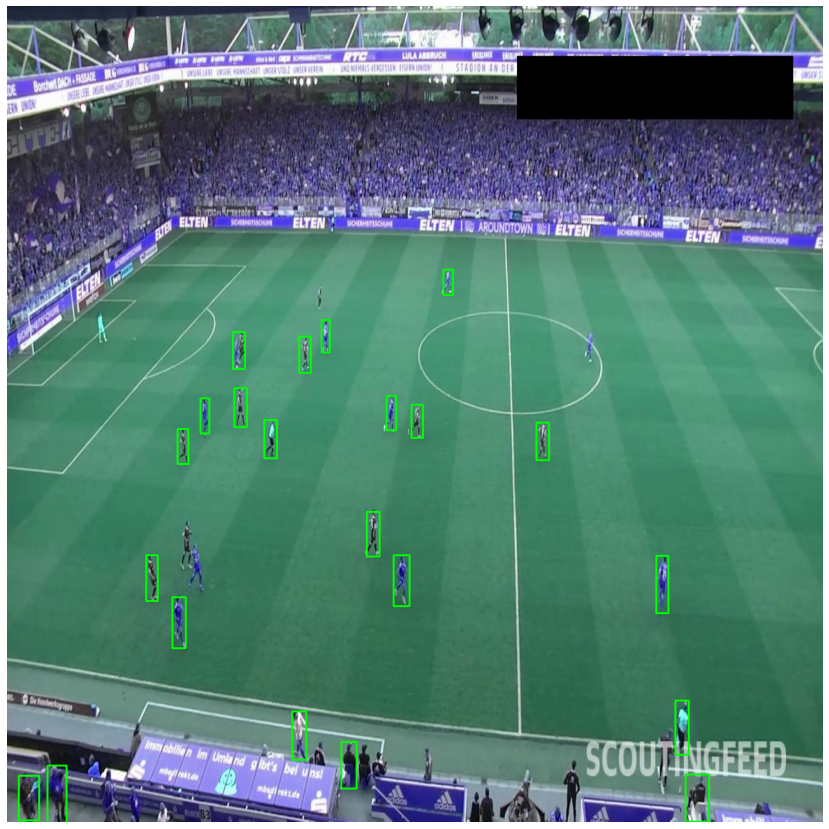

In [28]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15), facecolor='white')

MODEL_IMG_SIZE = 640
ENDPOINT_URL = "http://localhost:5543/yolov5-s-coco/predict/from_files"
IMAGE_PATH = "test/images/a9f16c_2_9_png.rf.c048a60764e56735d7465cdec974d102.jpg"

im = cv2.imread(IMAGE_PATH)
im_size = im.shape[:2]
assert im_size[0] == im_size[1]
scale_ratio = im_size[0] / MODEL_IMG_SIZE

resp = requests.post(
  url=ENDPOINT_URL,
  files=[('request', open(IMAGE_PATH, 'rb'))]
)

boxes = json.loads(resp.text)['boxes'][0]
for xmin, ymin, xmax, ymax in boxes:
    start_point = (int(xmin * scale_ratio), int(ymin * scale_ratio))
    end_point = (int(xmax * scale_ratio), int(ymax * scale_ratio))
    color = (0, 255, 0)
    thickness = 2
    im = cv2.rectangle(im, start_point, end_point, color, thickness)


plt.axis("off")
plt.imshow(im)

In [12]:
import time
time.sleep(1)

In [ ]:
import requests, json, os, time

# the dataset we downloaded had 3 subsets in 3 folders
paths = []
for folder_name in ['test', 'valid', 'train']:
    path = f"{folder_name}/images/"
    paths += [path + img_name for img_name in os.listdir(path)]
    

# same URL for the endpoint as before
ENDPOINT_URL = "http://localhost:5543/yolov5-s-coco/predict/from_files"


# send each image to the endpoint
i = 0
print(f"Sending {len(paths)} images to the server")
for image_path in paths:
    if i % 60 == 0:
        print(i)
    i+=1
    
    resp = requests.post(
      url=ENDPOINT_URL,
      files=[('request', open(image_path, 'rb'))]
    )
    print(resp)
    time.sleep(0.1)


Sending 663 images to the server
0
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [20

In [1]:
!pip install requests_toolbelt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2, io, requests
import numpy as np
from PIL import Image
from requests_toolbelt import MultipartEncoder

# paths
video_path = "soccer_clip.mp4"
predict_url = "http://localhost:5543/predict/from_files"

# Read until video is completed
cap = cv2.VideoCapture('soccer_clip.mp4')
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    frame = np.array(frame)
    assert(frame.shape == (1080, 1920, 3))
    frame = frame[:, :1080,:] # crop image to square
    
    img = Image.fromarray(frame, mode="RGB")
    img.save("img.jpeg", quality=90, format="JPEG")
    
    r = requests.post(predict_url, 
                      files=[("request", open("img.jpeg", 'rb'))])
    print(r)
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [3]:
import requests, json
import os, random

path = "/home/robertgshaw/dev/nm-roboflow/data/test/images/"
path += random.choice(os.listdir(path))

resp = requests.post(
  url="http://localhost:5543/yolov5-s-coco/predict/from_files",
  files=[('request', open(path, 'rb'))]
)

resp_dict = json.loads(resp.text)

print(len(resp_dict["boxes"][0]))

12
